<a href="https://colab.research.google.com/github/Deep-of-Machine/Handwriting_Classification_AI/blob/main/%EC%86%90%EA%B8%80%EC%94%A8_%EB%B6%84%EB%A5%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import gzip
import shutil
import os

#압축 풀기 코드

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('/content') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())


In [ ]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터 불러오기"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels


In [ ]:
X_train, y_train = load_mnist('', kind='train')
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

error: ignored

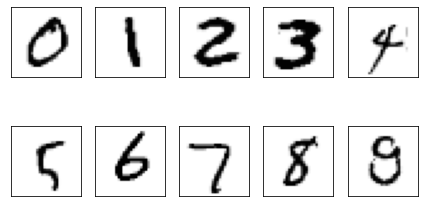

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

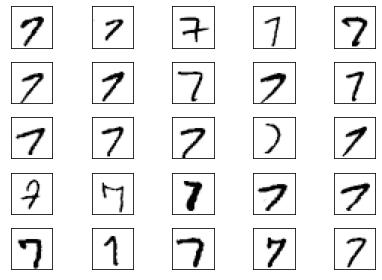

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
np.random.seed(123)
y_train_onehot = tf.keras.utils.to_categorical(y_train)
 
print('처음 3개 레이블: ', y_train[:3])
print('\n처음 3개 레이블 (원-핫):\n', y_train_onehot[:3])

처음 3개 레이블:  [5 0 4]

처음 3개 레이블 (원-핫):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,    
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=50,    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=y_train_onehot.shape[1],    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

history = model.fit(X_train, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 2s 3ms/step - loss: 0.8470 - val_loss: 0.3973
Epoch 2/50
844/844 [==============================] - 2s 2ms/step - loss: 0.3964 - val_loss: 0.2934
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.3243 - val_loss: 0.2510
Epoch 4/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2871 - val_loss: 0.2289
Epoch 5/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2604 - val_loss: 0.2074
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2401 - val_loss: 0.1920
Epoch 7/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2236 - val_loss: 0.1788
Epoch 8/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2089 - val_loss: 0.1729
Epoch 9/50
844/844 [==============================] - 2s 2ms/step - loss: 0.1968 - val_loss: 0.1612
Epoch 10/50
844/844 [==============================] - 2s 2ms/step - loss: 0.1856 - val_loss: 0.1523

In [ ]:
predictions = model.predict_classes(X_train,  verbose=0)
correct_preds = np.sum(y_train == predictions, axis=0) 
train_acc = correct_preds / y_train.shape[0]

print('처음 3개 예측: ', predictions[:3])
print('훈련 정확도: %.2f%%' % (train_acc * 100))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
처음 3개 예측:  [5 0 4]
훈련 정확도: 98.60%


In [ ]:
predictions = model.predict_classes(X_test,  verbose=0)
correct_preds = np.sum(y_test == predictions, axis=0) 
train_acc = correct_preds / y_test.shape[0]

print('처음 3개 예측: ', predictions[:3])
print('훈련 정확도: %.2f%%' % (train_acc * 100))

처음 3개 예측:  [7 2 1]
훈련 정확도: 96.91%


In [ ]:
predictions = model.predict(X_test, verbose=0)
print(predictions[0])
np.argmax(predictions[0])

[4.6001151e-05 2.0132641e-06 4.8604297e-06 3.5654681e-04 4.2177291e-07
 7.5959247e-07 1.3910988e-08 9.9956030e-01 5.4383277e-06 2.3582705e-05]


7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #plt.imshow(img, cmap=plt.cm.binary)
  plt.imshow(img.reshape(28, 28), cmap='Greys')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
  

  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

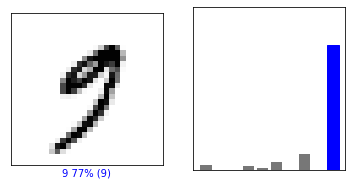

In [ ]:
i = 2582
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

NameError: ignored